In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel(r"C:\\Users\\kusha\\Desktop\\data sci\\python\scratch simple linear regression\\airpollution\\AirPollution.xls")
print(df.head())
print(df.shape)

     PM10    Pb    Cd    Cu    Cr  Zn    NOx    SO2    Site Unnamed: 9  Season
0  120.71  2.67  0.01  0.53  0.61   0  84.17  40.37  Mandai 2004-02-07  Summer
1  140.25  3.49  0.02  0.10  0.91   0  88.81  39.48  Mandai 2004-02-14  Summer
2  107.01  1.31  0.01  0.19  0.48   0  81.49  48.29  Mandai 2004-02-21  Summer
3   88.81  0.76  0.00  0.33  0.39   0  61.80  27.42  Mandai 2004-02-28  Summer
4   75.05  0.60  0.00  0.41  1.54   0  48.71  19.23  Mandai 2004-03-06  Summer
(151, 11)


In [3]:
dellist = ["Zn" , "Site" , "Unnamed: 9" , "Season"]
for val in dellist:
    del df[val]
print(df.head())

     PM10    Pb    Cd    Cu    Cr    NOx    SO2
0  120.71  2.67  0.01  0.53  0.61  84.17  40.37
1  140.25  3.49  0.02  0.10  0.91  88.81  39.48
2  107.01  1.31  0.01  0.19  0.48  81.49  48.29
3   88.81  0.76  0.00  0.33  0.39  61.80  27.42
4   75.05  0.60  0.00  0.41  1.54  48.71  19.23


In [4]:
df.isnull().sum()

PM10    0
Pb      0
Cd      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

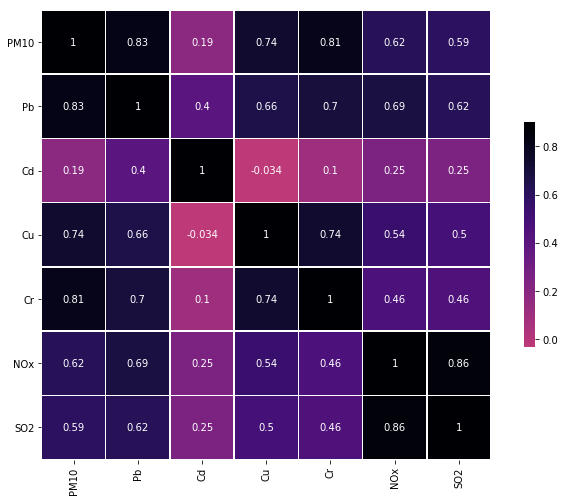

In [5]:
cormat = df.corr()
a4_dimens = (11.7 , 8.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.heatmap(cormat, cmap="magma_r", vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot = True , 
            xticklabels=cormat.columns.values ,
            yticklabels=cormat.columns.values,
            ax = ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

In [6]:
del df["SO2"]
print(df.head())

     PM10    Pb    Cd    Cu    Cr    NOx
0  120.71  2.67  0.01  0.53  0.61  84.17
1  140.25  3.49  0.02  0.10  0.91  88.81
2  107.01  1.31  0.01  0.19  0.48  81.49
3   88.81  0.76  0.00  0.33  0.39  61.80
4   75.05  0.60  0.00  0.41  1.54  48.71


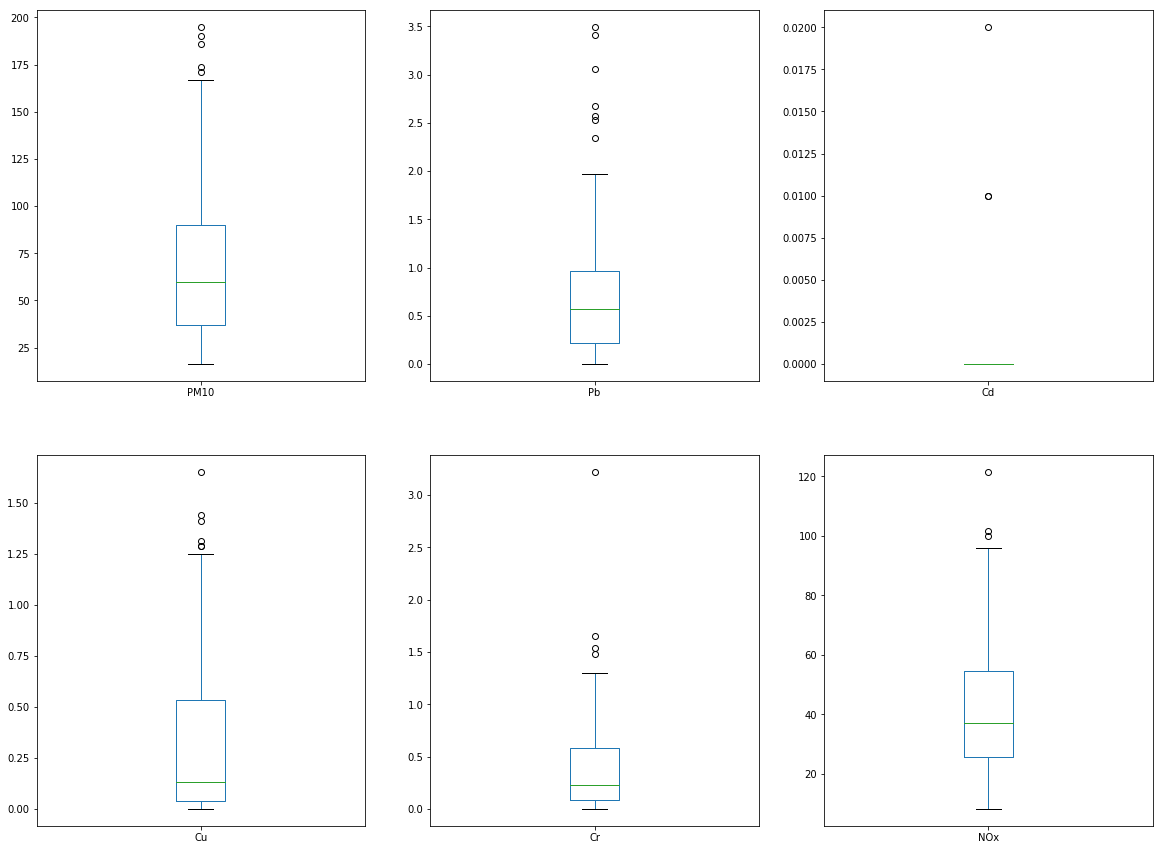

In [7]:
df.plot(kind = "box" , subplots=True , layout = (2,3) ,figsize = (20,15), sharex = False)
plt.show()

In [8]:
outlier_columns = ["PM10" , "Pb" , "Cu" , "Cr" , "NOx"]
for outlier in outlier_columns:
     B= plt.boxplot(df[outlier])
     value = [item.get_ydata()[1] for item in B['whiskers']]
     upper_whisker = value[1]
     df[outlier][df[outlier] > upper_whisker] = upper_whisker

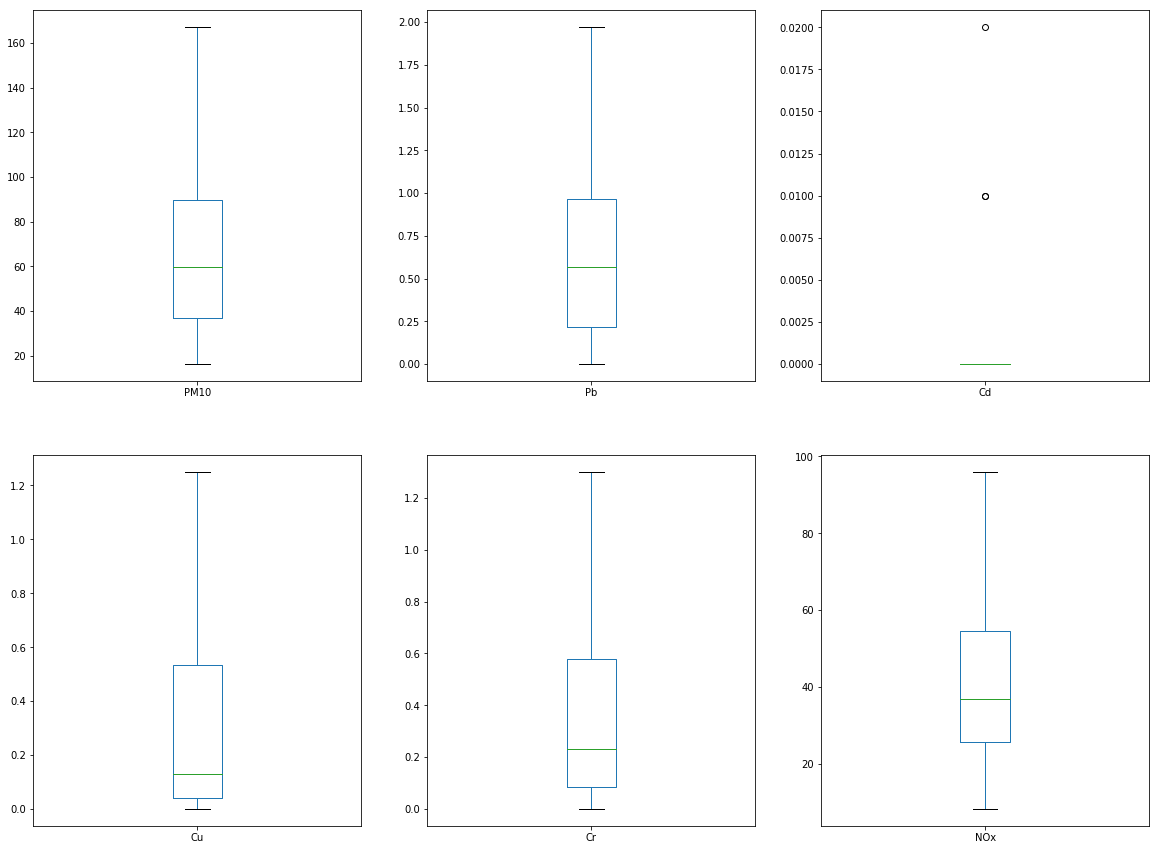

In [10]:
df.plot(kind = "box" , subplots=True , layout = (2,3) ,figsize = (20,15), sharex = False)
plt.show()

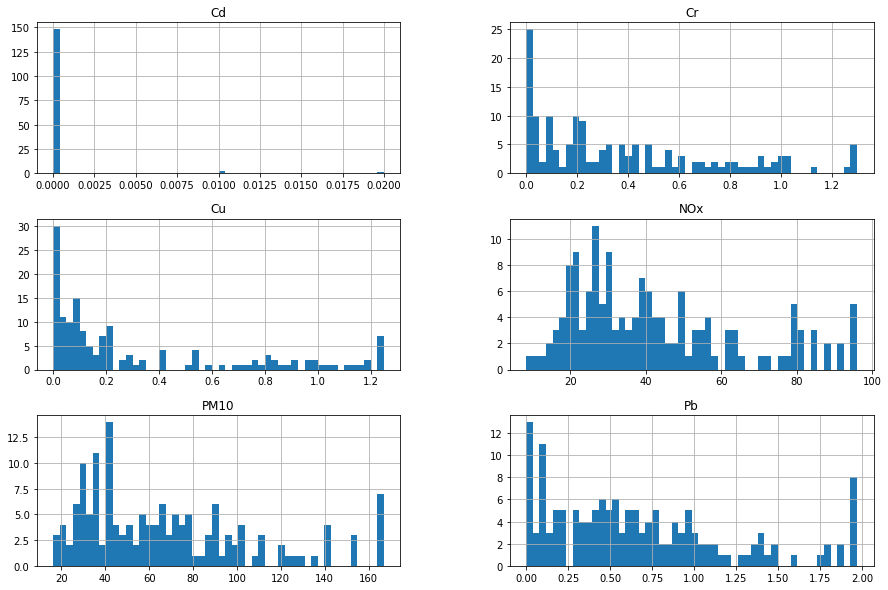

In [11]:
df.hist(bins = 50 , figsize = (15,10))
plt.show()

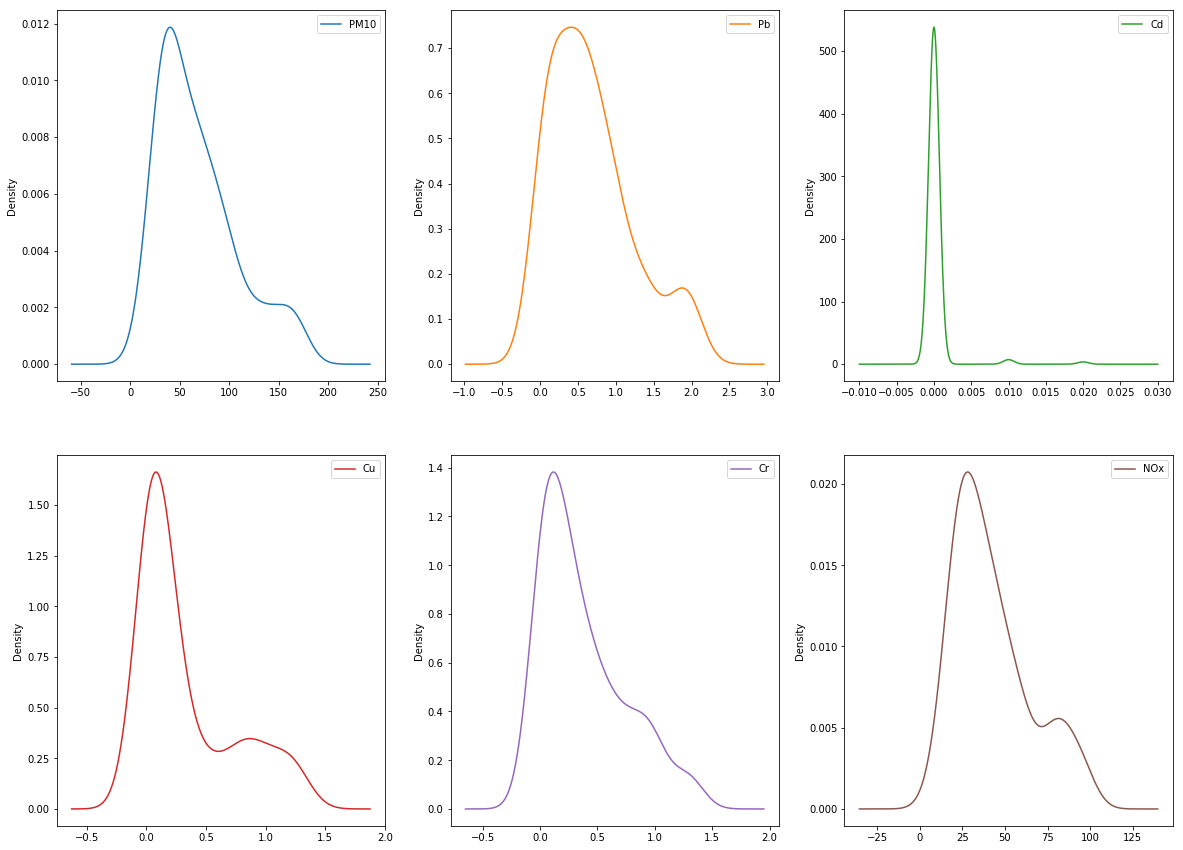

In [12]:
df.plot(kind = "density" , subplots=True , layout = (2,3) ,figsize = (20,15), sharex = False)
plt.show()

In [13]:
del df["Cd"]
df.head()

,PM10,Pb,Cu,Cr,NOx
0,120.71,1.97,0.53,0.61,84.17
1,140.25,1.97,0.10,0.91,88.81
2,107.01,1.31,0.19,0.48,81.49
3,88.81,0.76,0.33,0.39,61.80
4,75.05,0.60,0.41,1.30,48.71


In [14]:
y = df.iloc[:,0:1].values
x = df.iloc[:,1:]
x0 = np.ones([x.shape[0],1])
x = np.concatenate((x0,x) , axis = 1)

In [15]:
from sklearn.model_selection import train_test_split as tt
x_train , x_test , y_train , y_test = tt(x,
                                         y,
                                         test_size = 0.35, 
                                         random_state = 10)

<h1>Cost Function</h1>

In [16]:
def costFunction(x,y,theta):
    costF = ( (x @ theta.T) - y)**2
    return sum(costF)/(2*len(x))

<h1>Gradient Descent</h1>

In [17]:
def gradientDescent(x,y,theta ,learningRate ,i):
    cost = np.zeros(i)
    for n in range(i):
        theta = theta - (learningRate/len(x))* np.sum(x*((x @ theta.T)-y) , axis = 0)
        cost[n] = costFunction(x,y,theta)
        
    return theta , cost

In [18]:
theta = np.zeros([1,df.shape[1]])
print(theta)

[[0. 0. 0. 0. 0.]]


<b><p>Initializing theta0 , theta1 , theta2 , theta3</p>
<p>Where, 
theta0 = "intercept"
and
theta1 , theta2 , theta3 = "slope"
</p></b>

In [19]:
alpha = 0.0009
iteration = 400000

<b><p>alpha = "Learning rate"</p>
<p>iteration = "number of iteration to minimize the cost function or to get the best cost function"</p></b>

<h3>Training</h3>

In [20]:
coef , costs = gradientDescent(x_train ,
                               y_train , 
                               theta , 
                               alpha , 
                               iteration)

print("theta0,theta1,theta2,theta3 : ")
print(coef)

theta0,theta1,theta2,theta3 : 
[[2.44080126e+01 3.18762807e+01 1.25101491e+01 4.34832088e+01
  4.10339731e-02]]


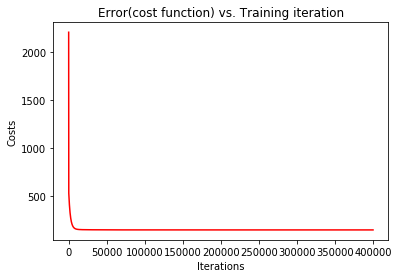

In [21]:
plt.plot(np.arange(iteration), costs, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Costs')  
plt.title('Error(cost function) vs. Training iteration')
plt.show()

<b>As we can see in the above plot our cost function is decreasing per iteration which means , gradient descent is working proper</b>

In [22]:
final_cost = costFunction(x_train,y_train,coef)
print(final_cost)

[147.72221971]


<b>Testing the model</b>

In [23]:
def linearRegression(x ,thetas):
    #linear regression : h(x) = theta0 + theta1 * x1 + .....+ thetan * xn
    pred_y =  x @ thetas.T 
    
    return pred_y 

In [24]:
pred_y = linearRegression(x_test,coef)

In [25]:
print("r2 = " , r2_score(y_test,pred_y))

r2 =  0.8285164807143862


In [26]:
residuals = y_test -  pred_y
print(np.mean(residuals))

0.22145971293522648


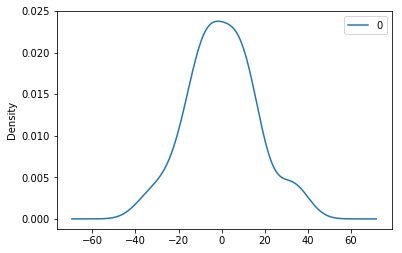

In [28]:
pd.DataFrame(residuals).plot(kind = "density" )
plt.show()